## Week 8-1: Dirichlet Process Mixtures

_Bo Y.-C. Ning_

#### Last time
* ECDF, Histograms, KDE

#### Today
* Dirichlet process
* Dirichlet process mixtures

#### Reference
* __(GvdVNB)__ Ch4\&5 of Ghoshal and van der Vaart (2017). Fundamentals of Nonparametric Bayesian Inference. _Cambridge_
* Thomas S. Ferguson (1973). A Bayesian Analysis of Some Nonparametric Problems. _AoS_ 1:209--230 
* Escobar, M. and M. West (1995). Bayesian Density Estimation and Inference Using Mixtures. _JASA_ 90:577--588
* Freedman, D. (1963). On the asymptotic behavior of Bayes' estimates in the discrete case. _Ann. Math. Statist._ 34:1386--1403
* Ghosal, S., J. Ghosh, and A. van der Vaart (2000). Convergence rates of posterior distributions. _AoS_ 28:500-531
* Ghosal, S. and A. van der Vaart (2007). Posterior convergence rates of Dirichlet mixtures at smooth densities. _AoS_ 35:697--723

### Bayesian nonparametrics



We have learned that in parametric Bayesian method, we have a parametric model $f(X^n|\theta)$, $\theta \in \Theta$, and then put a prior on $\theta$, $\pi(\theta)$. Then the posterior distribution is obtained using Bayes' rule:
$$
\pi(\theta | X^n) = \frac{f(X^n|\theta)\pi(\theta)}{\int f(X^n | \theta) \pi(\theta) d\theta}
$$

In nonparametric Bayes, we replace the model with a infinite dimensional model and the parameter is often a function. The restriction of the function can be, e.g., smoothness, $\mathcal{F} = \{f: \int (f''(x))^2 dx \leq \infty\}$, monotonicity, or positivity. 

If there is a dominating measure for a set $A$, $f \in A$, then the posterior distribution can be written as 
$$
\pi(f \in A | X) = \frac{\int_A f(X^n) d\Pi(f)}{\int_{f \in \mathcal{F}} f(X^n) d\Pi(f)}
$$
The parameter in nonparametric statistics is a function. 

Then a challenging for nonparametric Bayes is to construct a prior on a infinite-dimensional space $\mathcal{F}$. 
Ideally, such a construction should 1) makes the posterior computable (e.g., easy to obtain random samples from the posterior); 2) possesses a valid frequentist properties (e.g., optimal convergence rate, valid uncertainty quantification, etc.)

### Dirichlet process

The Dirichlet process prior is one of the most popular prior in Bayesian nonparametrics. It also has a deep connection with the frequentist approaches mentioned in the last lecture. More specifically:

- For estimating a CDF: (Freq) empirical cdf; (Bayesian) Dirichlet process
- For estimating a density: (Freq) KDE; (Bayesian) Dirichlet process mixtures

To start, we introduce the Dirichlet distribution. 

__Definition 1__ (Dirichlet distribution). The _Dirichlet distribution_ $\text{Dir}(k; \alpha)$ with parameter $k \geq 2$ and $\alpha = \alpha_1, \dots, \alpha_k$ is the distribution of the vector $(X_1, \dots, X_k)$, $\sum_{i=1}^{X_i} = 1$, such that $(X_1, \dots, X_{k-1})$ has the density 

$$
\frac{\Gamma(\alpha_1 + \cdots + \alpha_k)}{\Gamma(\alpha_1) \cdots \Gamma(\alpha_k)} 
x_1^{\alpha_1-1} x_2^{\alpha_2-1} \cdots x_{k-1}^{\alpha_{k-1}-1} (1 - x_1 - \cdots - x_{k-1})^{\alpha_k - 1},
$$

where $x \in \mathbb{S}_{k} = \{(x_1, \dots, x_k): \min_i x_i \geq 0, \sum_{i=1}^{k} x_i = 1\}$, a ($k-1$)-simplex. 

_Special cases:_

* When $k = 2$, the Dirichlet distribution is the beta distribution 

$$
\frac{\Gamma(\alpha_1 + \alpha_2)}{\Gamma(\alpha_1)\Gamma(\alpha_2)} x_1^{\alpha_1-1} (1-x_1)^{\alpha_2-1}.
$$

Indeed, the Dirichlet distribution is multivariate generalization of the beta distribution.

* For independent random variables $(Y_1, \dots, Y_k)$ and $Y = \sum_{i=1}^k Y_i$:

    - If $Y_i \sim \text{Gamma}(\alpha_i, 1)$, then $(Y_1, \dots, Y_k)/Y \sim \text{Dir}(k; \alpha_1, \dots, \alpha_k)$
    
    - If $Y_i \sim \text{Beta}(\alpha_i, 1)$, then $((Y_1, \dots, Y_k) | Y = 1) \sim \text{Dir}(k; \alpha_1, \dots, \alpha_k)$
    
    - If $Y_i \sim \text{Exponential}(\alpha_i)$, then $((e^{-Y_1}, \dots, e^{-Y_k}) | \sum_{i=1}^k e^{-Y_i} = 1) \sim \text{Dir}(k; \alpha_1, \dots, \alpha_k)$.


<img src="dirdist.jpg" width=80%>  

(Source: [Wikipedia](https://en.wikipedia.org/wiki/Dirichlet_distribution))

The Dirichlet process is one of the most popular (default) priors in Baysian nonparametrics. It is the infinite-dimensional generalization of the Dirichlet distribution.

__Definition 2__ (Dirichlet process). A random measure $P$ on a measurable space $(\mathfrak{X}, \mathcal{X})$ is said to possesse a _Dirichlet process_ distribution with a base probability measure $G_0$ and a positive $\alpha \in \mathbb{R}$, which is denoted by $P \sim \text{DP}(\alpha)$, for every finite measurable partition $A_1, \dots, A_k$ of $\mathfrak{X}$,

$$
(P(A_1), \dots, P(A_k)) \sim \text{Dir}(k; \alpha(A_1), \dots, \alpha(A_k)),
$$

We write $|\alpha| = \alpha(\mathfrak{x})$ as its total mass and $\bar \alpha = \alpha/|\alpha|$ the probability measure by normalizing $\alpha$.
Sometime, we write $P \sim \text{DP}(MG_0)$. In this case $M =|\alpha|$ and $\bar \alpha = \alpha/M$ has cumulative distribution function $G_0$. $G_0$ is known as the _base probability distribution_. Some literature uses $P \sim \text{DP}(M, G_0)$ instead.  

### Means, variances, and covariances of DP

If $P \sim \text{DP}(G_0, M)$, then for any measurable set $A$ and $B$,

- Mean: $\mathbb{E}(P(A)) = \bar\alpha (A) = G_0(A)$

- Variance: $\text{var}(P(A)) = \frac{G_0(A) (1- G_0(A))}{M+1}$

- Covariance: $\text{cov}(P(A), P(B)) = \frac{G_0(A \cap B) - G_0(A) G_0(B)}{1 + M}$

This suggests that for a large $M$, the mass of the DP will more concentrate around its mean, as the variance becomes smaller. Hence, $M$ determines the concentration mass around the mean. As $M \to \infty$, $P(A) \to G_0(A)$ weakly for any measurable set $A$. Note that, $P(A)$ and $G_0(A)$ do not need to be absolutely continuous as posterior draws follows a discrete distribution despite that $G_0$ is often chosen as a smooth density (e.g., normal). 

#### Posterior distribution 

We now derive the posterior distribution. Consider the model 

$$
P \sim \text{DP}(M, G_0), \quad \quad X_1, \dots, X_n | P \sim P,
$$

Let $X_1, \dots, X_n$ takes values in $\mathfrak{X}$, consider finite measurable partitions of $\mathfrak{X}$ given by $A_1, \dots, A_K$. Let $n_k \sim \#\{X_i \in A_k\}$ the number of observations in $A_k$. Then by using the fact that the multinomial distribution is conjugate with the Dirichlet distribution, we obtain 

$$
(P(A_1), \dots, P(A_K)) \sim \text{DP}\big(
M G_0(A_1) + n_1, \dots, M G_0(A_K) + n_K
\big).
$$

By writting $n_k = \sum_{i=1}^n \delta_{X_i}(A_k)$, where $\delta_{X_j}$ is a point mass located at $X_j$. Then one can write the posterior distribution as 

$$
(P(A_1), \dots, P(A_K)) \sim \text{DP} \Big(M + n,
\frac{MG_0 + \sum_{i=1}^n \delta_{X_i} }{M + n}
\Big).
$$

Thus, the posterior distribution is a weighted average between the empirical distribution $\sum_{i=1}^n \delta_{X_i}$ (with the weight $n/(M+n)$ and the base probability distribution $G_0$ (with the weight $M/(M +n)$). 
Intuitively, one can see that when $M \to 0$ or $n \to \infty$, the posterior distribution is close to the empirical distribution.


__Theorem 2__ (Posterior consistency). Suppose $X_1, \dots, X_n$ are i.i.d. random variables with distribution $P_0$, then 

1. If $n \to \infty$, then $\text{DP}(\alpha + \sum_{i=1}^n \delta_{X_i}) \rightsquigarrow \delta_{P_0}$ almost surely;
2. If $|\alpha| \to 0$, then $\text{DP}(\alpha + \sum_{i=1}^n \delta_{X_i}) \rightsquigarrow \text{DP}(\sum_{i=1}^n \delta_{X_i})$ almost surely. (Bayesian bootstrap)

__Theorem 3__ (Benstein-von Mises theorem). If $X_1, X_2, \dots$ are i.i.d. random variables with distribution $P_0$
and $P | X_1, \dots, X_n \sim \text{DP}(\alpha + n \mathbb{P}_n)$, $\mathbb{P_n}$ is the emprical distribution of $X_1, \dots, X_n$, then as $n \to \infty$,

$$
P\Big(\sqrt{n} \big(P - \mathbb{P}_n \big) | X_1, \dots, X_n\Big) \rightsquigarrow G_{P_0} \ \text{a.s.},
$$
where $G_{P_0}$ a $P_0$-Brownian bridge process. 

The above theorem implies that the $(1-\alpha)$% Bayesian credible interval of the Dirichlet process is asymptotically the $(1-\alpha)$% frequentist confidence interval. 



### Construction of a Dirichlet process

A Dirichlet process has three equivalent constructions: stick-breaking, Pólya-urn scheme, and Chinese restaurant process. We only look at the stick-breaking representation and the Chinese restaurant process. The Pólya-urn scheme is left to self-study (read Ch 4.2.4 of GvdVNP). 

#### Stick-breaking representation:

<img src="stickbreaking.jpg" width=70%>  


For a stick has length 1, we break it at $\beta_1$ and assign the length $\pi_1$ to be the length of the stick just broke off. Next, break the remaining part at $\beta_2$ and assign the length $\pi_2$ to be its length. We continute to obtain $\pi_3, \pi_4, \dots$ so on and so forth. Mathematically, we denote the process by 

$$
\beta_k \overset{ind}{\sim} \text{Beta}(1, M), \quad \quad \pi_k = \beta_k \prod_{i=1}^{k-1}(1 - \beta_i)
$$

In [1]:
import numpy as np

def stick_breaking(num_weights, M):
    betas = np.random.beta(1, M, num_weights)
    remaining_lengths = np.append(1, np.cumprod(1 - betas))[0:num_weights]
    weights = remaining_lengths * betas
    return(weights)

(0.0, 1.0)

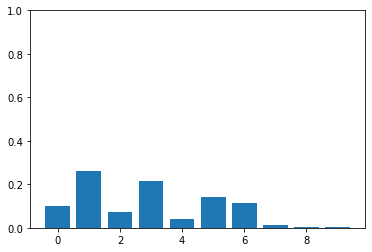

In [60]:
num_weights = 10
M = 2
wt = stick_breaking(num_weights, M)

import matplotlib.pyplot as plt
plt.bar(range(num_weights), wt)
plt.ylim(0, 1)

(0.0, 1.0)

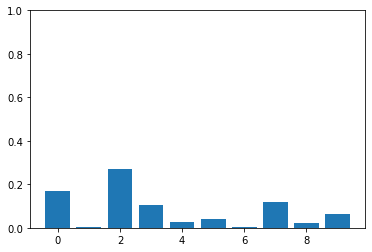

In [63]:
num_weights = 10
M = 5
wt = stick_breaking(num_weights, M)

import matplotlib.pyplot as plt
plt.bar(range(num_weights), wt)
plt.ylim(0, 1)

__Theorem 3__ (Sethuraman, 1994) If $\theta_1, \theta_2, \dots \overset{iid}{\sim} G_0$, $\beta_1, \beta_2, \dots \overset{iid}{\sim} \text{Beta}(1, M)$, and $\pi_k = \beta_k \prod_{i=1}^{k-1} (1 - \beta_i)$, 
then $P = \sum_{k=1}^\infty \pi_k \delta_{\beta_k} \sim \text{DP}(M G_0)$.



Example code: https://docs.pymc.io/en/v3/pymc-examples/examples/mixture_models/dp_mix.html

#### Chinese restaurant process (CRP)


Suppose $P \sim \text{DP}(M, G_0)$ and $\theta_i | P \sim P$, then for a measurable set $A$, the _posterior predictive distribution_ is given by 

$$
P(\theta_{n+1} \in A | \theta_1, \dots, \theta_n) = \frac{M}{M + n} G_0(A) + \frac{1}{M + n} \sum_{i=1}^n \delta_{\theta_i}(A).
$$

A popular metaphor to describe this formula is the _Chinese restaurant process_.
Imaging a Chinese restaurant with an infinite number of tables labelled by 1, 2, 3, .... Each table can seat infinite number of customers. The first customer enters the restaurant and sits at the first table. She then pick a sit randomly from $\theta \in G_0$. When the second customer enters the restuarant, she can decide whether to sit at the same table close to the first customer or choose a new table and pick a sit $\theta \in G_0$. 

In general, for the $n+1$-th customer enters the restaurant, she 

- pick table $j$ with the probability $\frac{n_j}{n + \alpha_0}$ and sit close to the first customer at $j$-th table;
- or pick a new table with the probability $\frac{\alpha_0}{n + \alpha_0}$ and pick the sit $\theta \sim G_0$.

We observe the following properties using the CRP metaphor:

- _Exchangeability_. The probability of a seating is invariant under permutations
- _Clustering_. Any seat arrangement creates a partition. 
- The expected number of occupied tables for $n$ customers are $E[k_n | \alpha_0] = O(\alpha_0 \log n)$, which grows logarithmly with $n$. This allows us to define a distribution on the space of all natural numbers.


### Dirichlet process mixtures

Sample draws from the Dirichlet process is discrete. This make DP useless for estimating a density function. A easy fix is to convolve it with a smooth kernel (in other words, go hierarchical), which leads to the Dirichlet process mixture model (DPMM).

The DPMM is given as follows:

\begin{align*}
& X_i | \Theta_n \sim f(x | \Theta_n),\\
& \Theta_n | P \sim P,\\
& P | \alpha, G_0 \sim \text{DP}(\alpha, G_0).
\end{align*}

#### MCMC

Example (Escobar and West): $X_1, \dots, X_n$ are independent, let $\Theta_i = (\theta_i, V_i)$, the model is given by 
\begin{align}
& X_i | \Theta_i \sim N(\theta_i, V_i),\\
& \Theta_i | P \sim P \\
& P \sim \text{DP}(\alpha, G_0).
\end{align}

We choose base measure $G_0$ from bivariate normal-gamma familty, 
with $\theta_i \sim N(0, \tau V_i)$, $V_i^{-1} \sim \text{Gamma}(s/2, S/2)$.

Then the conditional posterior
\begin{equation}
\Theta_i| \Theta_{-i}, x_1, \dots, x_n 
\sim 
q_0 G_i(\Theta_i) + \sum_{j\neq i} q_j \delta_{\Theta_j}(\Theta_i)
\end{equation}
where 
$G_i(\Theta_i)$ is the posterior of $\Theta_i$, 
and the components are $V_i^{-1} \sim \text{Gamma}(\frac{1+s}{2}, \frac{S_i}{2})$
with $S_i = S + X_i^2 / (1+\tau)$, 
$\theta_i| V_i \sim N(\frac{\tau X_i}{1+\tau}, \frac{\tau}{\tau+1} V_i)$.

We also have $q_0 + \sum_{j\neq i} q_j = 1$,
$$q_0 
\propto 
\alpha \frac{\Gamma((1+s)/2)}{\Gamma(s/2)}s^{-1/2}
[1 + X_i^2/(sM)]^{-(1+s)/2} / M^{1/2},
$$
where $M = (1+\tau)S/s$, and
$$
q_j
\propto
e^{- \frac{(X_i - \theta_j)^2}{2V_j}}(2V_j)^{-1/2}$$

The mean and second moment of $p(X)$ is
\begin{equation}
\begin{split}
E(p(X)| \Theta_1, \dots, \Theta_n) 
& = 
\frac{\alpha}{\alpha+n} \int N(X; \pi) dG(\Theta_i) 
+
\frac{1}{\alpha+n} \sum_{i=1}^n N(X; \theta_i, V_i)\\
& = 
\frac{\alpha}{\alpha+n} \frac{1}{\sqrt{2\pi}} 
\frac{ (S/2)^{s/2} \Gamma(s/2 + 1/2)}{\Gamma(s/2) (X^2/4 + S/2)^{s/2 + 1/2} }
+ 
\frac{1}{\alpha+n} \sum_{i=1}^n N(X; \theta_i, V_i)\\
E(p(X)^2| \Theta_1, \dots, \Theta_n) 
& = 
\frac{\alpha}{\alpha+n} \int N^2(X; \pi) dG(\Theta_i) 
+
\frac{1}{\alpha+n} \sum_{i=1}^n N^2(X; \theta_i, V_i)\\
& = 
\frac{\alpha}{\alpha+n} \frac{1}{2\sqrt{3}\pi}
\frac{ (S/2)^{s/2+1} }{(X^2/3 + S/2)^{s/2+1} }
+
\frac{1}{\alpha+n} \sum_{i=1}^n N^2(X; \theta_i, V_i),
\end{split}
\end{equation}
and 
$$
\text{Var}(P(X)|\Theta_1, \dots, \Theta_n) = E(P(X)^2|\Theta_1, \dots, \Theta_n) - (E(P(X)|\Theta_1, \dots, \Theta_n))^2
$$

In [1]:
import numpy as np
import scipy 
from scipy.special import gamma
from scipy.stats import norm

np.random.seed(202205)

In [2]:
# generate data from a mixture normal density

N = 100 # sample size
u = np.random.uniform(0, 1, N) #Sample N random uniforms u from [0, 1]
data = [] # create an empty array
for i in range(N):
    if u[i] <= 0.3:
        data = np.append(data, np.random.normal(-1.5, 0.5, 1))
    elif 0.3 < u[i] <= 0.8:
        data = np.append(data, np.random.normal(0, 1, 1))
    else: 
        data = np.append(data, np.random.normal(3, 2, 1)) 

<AxesSubplot:ylabel='Density'>

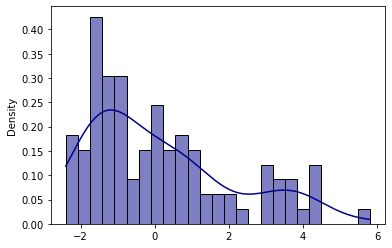

In [6]:
import seaborn as sns

sns.histplot(data, bins = 25, kde = True, stat = "density", color = 'darkblue')

In [50]:
# check bugs

def DPMM_MCMC(data, grid, alpha = 4, iterloop = 100):
    
    x = data
    n = data.shape[0] # length of data
    k = n
    # specify the prior hyperparameters
    m = 0
    tau = 1
    s = 4
    S = 4
    alpha = alpha
    M = (1 + tau)*S/s
    
    # choose starting point of theta and V
    theta = x
    V = 1/np.random.gamma(s/2, 2/S, k)

    # iteration
    iterloop = iterloop
    theta = np.ones(k)
    prob = np.zeros(k)
    q1 = np.zeros(k)
    
    # for estimate density, we choose a grid from -3 to 6
    grid = grid
    grid_size = grid.shape[0]
    # create empty array to collect draws
    theta_draw = V_draw = np.zeros(shape=(k, iterloop))
    mean_draw = var_draw = np.zeros(shape=(grid_size, iterloop))
    
    # start MCMC
    for iter in range(iterloop):
        
        for i in range(k):
        # calculate q0 and q1
            q0 = alpha*gamma((1+s)/2)*gamma(2/s)/np.sqrt(s)*(1 + x[i]**2/(s*M))**(-(1+s)/2) / np.sqrt(M)
            for j in range(k):
                q1[j] <- np.exp(-(x[i] - theta[j])**2 / (2*V[j])) / np.sqrt(2*V[j])
        
            prob = q1
            prob[i] = q0
            prob = prob / sum(prob)
            
         # draw theta and V
            # draw theta 
            number = np.random.choice(np.arange(0, k), 1, p = prob)
            if number == i:
                SS = S + x[i]**2 / (1+tau)
                V[i] = 1/np.random.gamma((1+s)/2, 2/SS, 1)
                theta[i] = np.random.normal(tau*x[i]/(1+tau), np.sqrt(tau/(1+tau) * V[i]), 1)
            else:
                V[i] = V[number]
                theta[i] = theta[number]
                
            # evaluate the mean and variance
            # mean
            mean_grid = second_moment_grid = []
            for d in range(grid.shape[0]):
                mean_grid = np.append(mean_grid, sum(norm.pdf(grid[d], theta, np.sqrt(V))))
                second_moment_grid = np.append(second_moment_grid, sum(norm.pdf(grid[d], theta, np.sqrt(V))**2))

            # calculate mean
            mean = alpha/(alpha + n)/(2*np.sqrt(np.pi))*(S/2)**(s/2)/gamma(s/2)*gamma(s/2+1/2)/(S/2 + grid**2/4)**(s/2+1/2)+1/(alpha+n)*mean_grid
            
            # calculate second moment
            second_moment = alpha/(alpha + n)/(2*np.sqrt(3)*np.pi)*(S/2)**(s/2+1)/(S/2 + grid**2/3)**(s/2+1)+1/(alpha+n)*second_moment_grid
            # calculate variance
            var = second_moment - mean**2
            
        theta_draw[:,iter] = theta
        V_draw[:,iter] = V
        mean_draw[:,iter] = mean
        var_draw[:,iter] = var
        
    return theta_draw, V_draw, mean_draw, var_draw
            

In [52]:
# create a grid
grid = np.arange(-4.5, 8, 0.1)
theta_draw, V_draw, mean_draw, var_draw = DPMM_MCMC(data, grid)

In [54]:
iterloop = 100
burnin = int(iterloop * 0.2)
mean_noburnin = mean_draw[:,(burnin+1):iterloop]
var_noburnin = var_draw[:, (burnin+1):iterloop]
mean_est = np.mean(mean_noburnin, 1)
var_est = np.mean(var_noburnin, 1)

In [ ]:
from matplotlib import pyplot as plt

sns.kdeplot(data)
plt.ylim(0, 0.5)
plt.plot(grid, mean_est, color = "red")
plt.plot(grid, mean_est + np.sqrt(var_est), color = "red", linestyle='dashed')
plt.plot(grid, mean_est - np.sqrt(var_est), color = "red", linestyle='dashed')

The MCMC algorithm above is essentially Gibbs sampling. It is also known as the _collapsed sampler_, as it integral out $G$. However, this method has two major deficit:

1. it only sample one data point at one time, so the mixing can be very slow;
2. if the likelihood is not conjugate, then the integration can be difficult. 

Other methods include the Blocked Gibbs Sampler, "no gaps" algorithm, slicing algorithm. Please read Ch 5.2 of GvdVNP for details. 

Posterior consistency for DPMM? Yes. For the Dirichlet mixture of normal prior, if the true density is $\beta$-smooth, then the posterior conergence rate is $n^{-\beta/(2\beta + 1)}\log (n)^t$ for some $t$. Note this is the same rate (up to a log factor) as the rate for KDE we showed last time when $\beta = 2$. If the true density itself is a mixture of normal densities, then the rate is much better, a near parameter rate $n^{-1/2}$ up to a log factor. 

However, in general, consistency is rare for Bayesian procedures. A famous example is given by Freedman (1963), which it shows that for $\theta_0$ the geometric distribution with parameter $1/4$, there exists a prior on $\mathbb{S}_\infty$, the infinite-dimensional unit simplex, that gives mass to every neighborhood of $\theta_0$, but the posterior concentrates in the neighborhoods of the geometric distribution with parameter $3/4$. In practice, one often work with "default" priors. Ghosal, Ghosh, and van der Vaart (2000) provides a general theory to obtain the posterior convergence rate. Studying the uncertainty quantification of a posterior is more difficult, one can read the recent works by Castillo and Nickl (2014) and Szabo, van der Vaart, and van Zanten (2015). 